### Maximizing Revenue for Taxi Cab Driver through Paymnet Type Analysis

#### Problem Statment

In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use dat-driven insights to maximise revenue streams for taxi driver in order to meet this need. Our research aims to determine whther paymnet methods have an impact on fare pricing by focusing on the relationship between paymnet type and fare amount.

#### Objective

This project main goal is to run an A/B test to examine the relationship between the total fare and the method of paymnet. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash, in particular, we want to find out if there is a big difference in the fare for those who pay with credit cards versus those who pay with cash.

#### Research Question

Is there a relationship between total fare amount and payment type and can we nudge customers towards paymnet methods that generate higer revenue for drivers, without negatively impacing custmer experience?

### Importing Libraries

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as st
import warnings
import statsmodels.api as sm
from scipy import stats
warnings.filterwarnings('ignore')

### Loading the dataset

In [48]:
pf = pd.read_csv('C:/Users/SMILE/Documents/data_analysis_with_python/Dataset/yellow_tripdata.csv')
pf

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0


In [54]:
pf.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


### Exploratory Data Analysis

In [55]:
pf.shape

(6405008, 18)

In [56]:
pf.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [57]:
pf['tpep_pickup_datetime'] = pd.to_datetime(pf['tpep_pickup_datetime'])
pf['tpep_dropoff_datetime'] = pd.to_datetime(pf['tpep_dropoff_datetime'])

In [ ]:
pf.info()

In [61]:
pf['duration'] = ((pf['tpep_dropoff_datetime'] - pf['tpep_pickup_datetime']).dt.total_seconds()/60).round(2)

In [62]:
pq = pf[['passenger_count','payment_type','fare_amount','trip_distance','duration']]

In [63]:
pq.isnull()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6405003,False,False,False,False,False
6405004,False,False,False,False,False
6405005,False,False,False,False,False
6405006,False,False,False,False,False


In [64]:
pq.isnull().sum()

passenger_count    0
payment_type       0
fare_amount        0
trip_distance      0
duration           0
dtype: int64

In [66]:
pq['passenger_count'].fillna((pq['passenger_count'].mean()), inplace = True)
pq['payment_type'].fillna((pq['payment_type'].mean()), inplace = True)

In [67]:
pq

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.000000,1.000000,6.00,1.20,4.80
1,1.000000,1.000000,7.00,1.20,7.42
2,1.000000,1.000000,6.00,0.60,6.18
3,1.000000,1.000000,5.50,0.80,4.85
4,1.000000,2.000000,3.50,0.00,2.30
...,...,...,...,...,...
6405003,1.515333,1.270298,17.59,3.24,31.00
6405004,1.515333,1.270298,46.67,22.13,76.00
6405005,1.515333,1.270298,48.85,10.51,27.83
6405006,1.515333,1.270298,27.17,5.49,22.65


In [68]:
65441/len(pq)*100

1.021716132126611

In [69]:
pq.isnull().sum()

passenger_count    0
payment_type       0
fare_amount        0
trip_distance      0
duration           0
dtype: int64

In [70]:
pq['passenger_count'] = pq['passenger_count'].astype('int64')
pq['payment_type'] = pq['payment_type'].astype('int64')

In [71]:
pq[pq.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.00,0.00,0.00
2441,1,1,52.00,0.00,0.20
2446,2,1,9.50,1.70,13.07
2465,1,1,4.00,0.40,3.08
3344,1,1,6.00,1.20,5.35
...,...,...,...,...,...
6404443,1,1,20.87,2.22,13.00
6404767,1,1,33.33,9.60,27.00
6404819,1,1,16.08,0.79,6.00
6404825,1,1,19.32,2.16,11.00


In [72]:
pq.drop_duplicates(inplace = True)

In [74]:
pq['passenger_count'].value_counts(normalize = True)

passenger_count
1    0.589102
2    0.187107
3    0.065230
5    0.061865
6    0.038603
4    0.035432
0    0.022641
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [75]:
pq['payment_type'].value_counts(normalize = True)

payment_type
1    6.837481e-01
2    3.023332e-01
3    8.572901e-03
4    5.345441e-03
5    3.267983e-07
Name: proportion, dtype: float64

In [76]:
pq = pq[pq['payment_type']<3]
pq = pq[(pq['passenger_count']>0)&(pq['passenger_count']<6)]

In [77]:
pq['payment_type'].replace([1,2],['Card','Cash'],inplace = True)

In [79]:
pq.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.832413e+06,2.832413e+06,2.832413e+06,2.832413e+06
mean,1.719888e+00,1.806772e+01,4.669345e+00,2.422972e+01
std,1.169934e+00,1.515596e+01,1.250167e+02,9.177089e+01
min,1.000000e+00,-5.000000e+02,-3.062000e+01,-2.770370e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.950000e+00
50%,1.000000e+00,1.350000e+01,2.770000e+00,1.585000e+01
75%,2.000000e+00,2.150000e+01,5.600000e+00,2.363000e+01
max,5.000000e+00,4.265000e+03,2.102401e+05,8.525120e+03


In [80]:
pq = pq[pq['fare_amount']>0]
pq = pq[pq['trip_distance']>0]
pq = pq[pq['duration']>0]

In [81]:
for col in ['fare_amount','trip_distance','duration']:
    q1 = pq[col].quantile(0.25)
    q3 = pq[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - (1.5*IQR)
    upper_bound = q3 + (1.5*IQR) 

    pq = pq[(pq[col] >= lower_bound)&(pq[col] <= upper_bound)]

In [82]:
print(lower_bound)
print(upper_bound)

-7.054999999999998
36.345


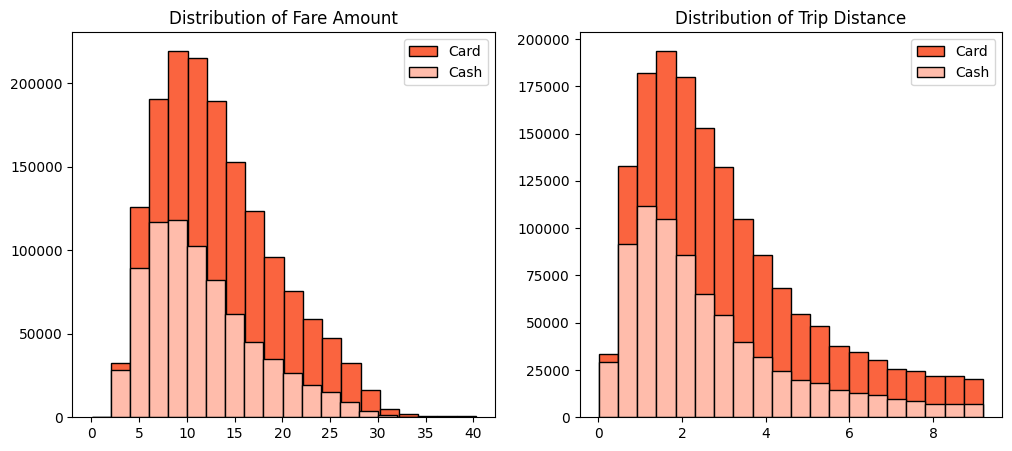

In [84]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Fare Amount')
plt.hist(pq[pq['payment_type'] == 'Card']['fare_amount'],histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#FA643F', label = 'Card')
plt.hist(pq[pq['payment_type'] == 'Cash']['fare_amount'],histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#FFBCAB', label = 'Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of Trip Distance')
plt.hist(pq[pq['payment_type'] == 'Card']['trip_distance'],histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#FA643F', label = 'Card')
plt.hist(pq[pq['payment_type'] == 'Cash']['trip_distance'],histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#FFBCAB', label = 'Cash')
plt.legend()
plt.show()

In [85]:
pq.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           13.411417  6.144651      3.055677  2.060260
Cash           11.844224  5.722757      2.634494  1.961119

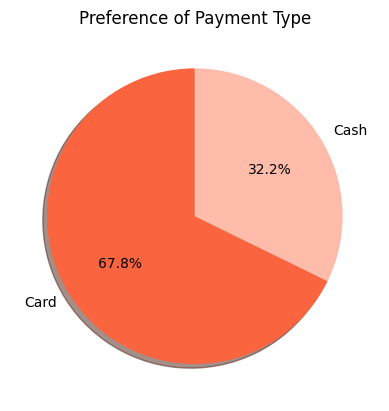

In [86]:
plt.title('Preference of Payment Type')
plt.pie(pq['payment_type'].value_counts(normalize = True), labels = pq['payment_type'].value_counts().index, startangle = 90, shadow = True, autopct = '%1.1f%%', colors = ['#FA643F','#FFBCAB'])
plt.show()

In [87]:
passenger_count = pq.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count':'count'},inplace = True)
passenger_count.reset_index(inplace = True)

In [34]:
passenger_count['percentage'] = (passenger_count['count']/passenger_count['count'].sum())*100

In [35]:
passenger_count

,payment_type,passenger_count,count,percentage
0,Card,1,945808,40.393683
1,Card,2,329470,14.071045
2,Card,3,122864,5.247291
3,Card,4,63935,2.730544
4,Card,5,124444,5.314770
5,Cash,1,463504,19.795385
6,Cash,2,156184,6.670325
7,Cash,3,54665,2.334639
8,Cash,4,32815,1.401467
9,Cash,5,47786,2.040850


In [36]:
df = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
df['payment_type'] = ['Card','Cash']
df.iloc[0,1:] = passenger_count.iloc[0:5,-1]
df.iloc[1,1:] = passenger_count.iloc[5:,-1]
df

,payment_type,1,2,3,4,5
0,Card,40.393683,14.071045,5.247291,2.730544,5.31477
1,Cash,19.795385,6.670325,2.334639,1.401467,2.04085


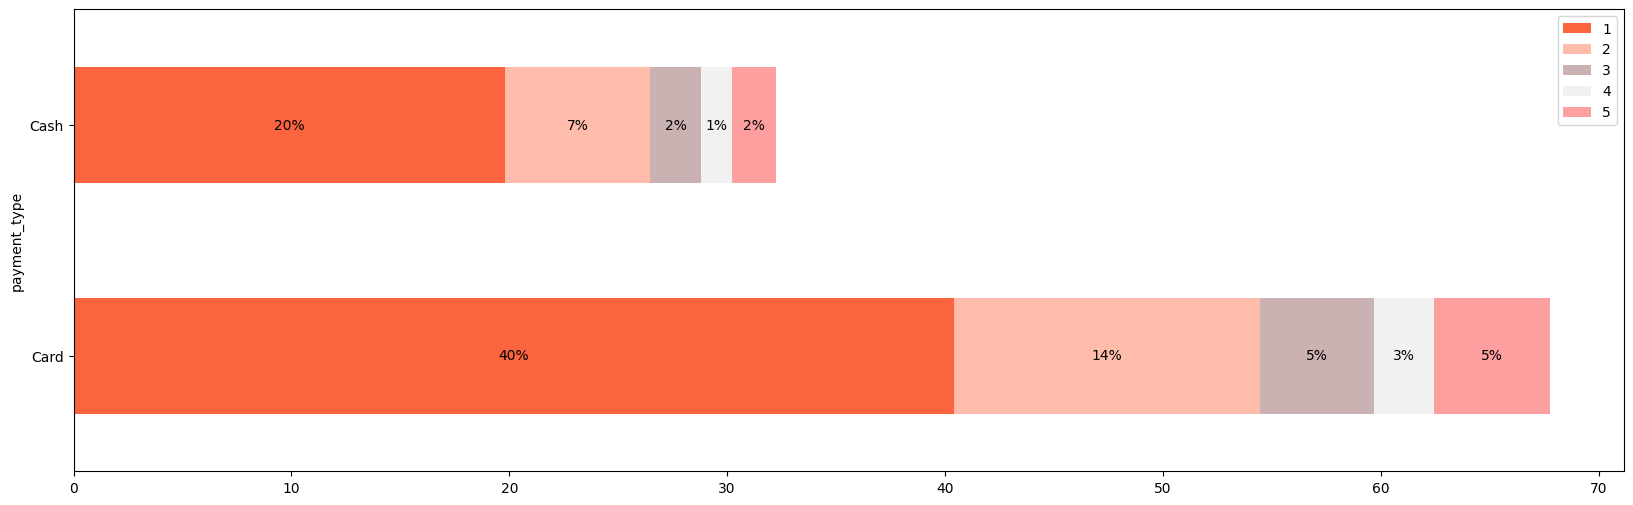

In [37]:
ax = df.plot(x='payment_type', kind='barh', stacked=True, color=['#FA643F','#FFBCAB','#CBB2B2','#F1F1F1','#FD9F9F'], figsize=(20,6))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}%'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center')

***Null hypothesis:*** There is no difference in average fare between cutomers who use credit cards and customers who use cash.

***Alternative hypothesis:*** There is a difference in average fare between customers who use credit cards and customers who use cash.

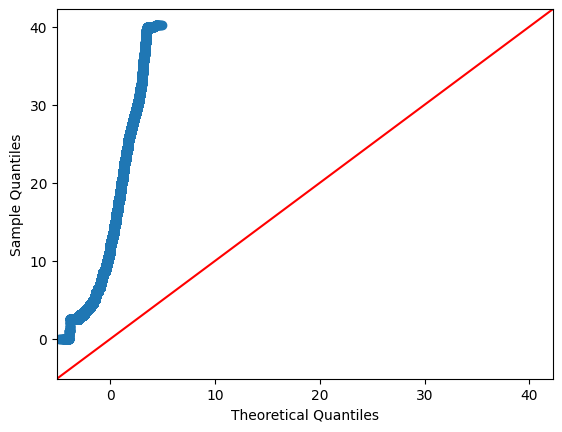

In [94]:
sm.qqplot(pq['fare_amount'], line = '45')
plt.show()

In [90]:
card_sample = pq[pq['payment_type']=='Card']['fare_amount']
cash_sample = pq[pq['payment_type']=='Cash']['fare_amount']

In [107]:
t_stats, p_value = stats.ttest_ind(a=card_sample, b=cash_sample, equal_var=False)
print('T statistic -',t_stats,'/p_value -',p_value)

T statistic - 191.2085438250723 /p_value - 0.0


***With a T-statistic of 191.2 and a P-value of less than 0.05, we reject the null hypothesis, suggesting that there is indeed a significant differerce in average fare between the two payment methods.***